In [41]:
# -*- coding: utf-8 -*-
import numpy as np
import random
import matplotlib.pyplot as plt

#評価関数: z = x^2 + y^2
def criterion(x, y):
    z = x * x + y * y
    return z

#粒子の位置の更新を行う関数
def update_position(x, y, vx, vy):
    new_x = x + vx
    new_y = y + vy
    return new_x, new_y

#粒子の速度の更新を行う関数
def update_velocity(x, y, vx, vy, p, g, w=0.5, ro_max=0.14):
    #パラメーターroはランダムに与える
    ro1 = random.uniform(0, ro_max)
    ro2 = random.uniform(0, ro_max)
    #粒子速度の更新を行う
    new_vx = w * vx + ro1 * (p["x"] - x) + ro2 * (g["x"] - x)
    new_vy = w * vy + ro1 * (p["y"] - y) + ro2 * (g["y"] - y)
    return new_vx, new_vy


In [42]:
N = 100  #粒子の数
x_min, x_max = -10, 10
y_min, y_max = -5, 5 

In [44]:
#粒子位置, 速度, パーソナルベスト, グローバルベストの初期化を行う
ps = [{"x": random.uniform(x_min, x_max), 
       "y": random.uniform(y_min, y_max)} for i in range(N)]
vs = [{"x": 0.0, "y": 0.0} for i in range(N)]

personal_best_positions = list(ps)
personal_best_scores = [criterion(p["x"], p["y"]) for p in ps]
best_particle = np.argmin(personal_best_scores)
global_best_position = personal_best_positions[best_particle]

T = 100  #制限時間(ループの回数)
losses = []

for t in range(T):
    for n in range(N):
        x, y = ps[n]["x"], ps[n]["y"]
        vx, vy = vs[n]["x"], vs[n]["y"]
        p = personal_best_positions[n]
            
        #粒子の位置の更新を行う
        new_x, new_y = update_position(x, y, vx, vy)
        ps[n] = {"x": new_x, "y": new_y}
            
        #粒子の速度の更新を行う
        new_vx, new_vy = update_velocity(
            new_x, new_y, vx, vy, p, global_best_position)
        vs[n] = {"x": new_vx, "y": new_vy}
            
        #評価値を求め, パーソナルベストの更新を行う
        score = criterion(new_x, new_y)
        if score < personal_best_scores[n]:
            personal_best_scores[n] = score
            personal_best_positions[n] = {"x": new_x, "y": new_y}
                
    #グローバルベストの更新を行う
    best_particle = np.argmin(personal_best_scores)
    global_best_position = personal_best_positions[best_particle]
    
    losses.append(personal_best_scores[best_particle])

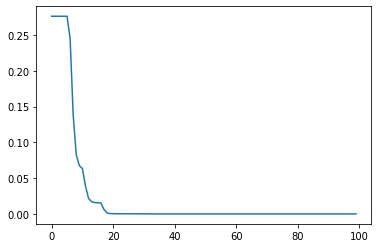

In [45]:
plt.plot(losses)

In [14]:
print(global_best_position)
print(min(personal_best_scores))

{'x': -2.5077347778869495e-05, 'y': -0.00012446081421704512}
1.6119367647192188e-08


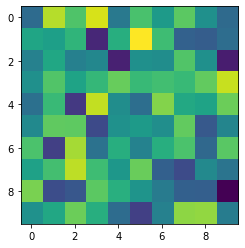

In [19]:
A = np.random.randn(10,10)

plt.imshow(A)